< [Module 4-1: Analyse statistique](04-statistiques.ipynb) | [Contents](index.ipynb) | [Module 4-3: Visualisation de données](04-visualisation.ipynb) >

In [1]:
%pylab
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics as smg
import pandas as pd
from pandas.plotting import parallel_coordinates, scatter_matrix
from scipy import stats


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/media/disk1/Research/Code/venv3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Analyse de la variance (ANOVA)

In [2]:
F, p = stats.f_oneway([1,2,3],[5,6,7])
print(F, p)

F, p = stats.f_oneway([25.6636147577, 26.8147042254, 26.5087485812, 26.0110693572, 26.1982930499, 25.0162178218, 25.4738536463, 25.7626961169, 26.2413388405, 26.6684925808],
                      [26.9368238908, 26.7905458624, 26.0659696128, 25.8725323008, 26.67954654, 26.9751683032, 26.0701459549, 26.1627538932, 26.9750950622, 25.6773437008],
                      [27.0405788466, 26.7461246306, 28.1998587517, 26.180994282, 27.4699458762, 26.2699015397, 26.1013955748, 27.9366444862, 26.1518355511, 26.4466845405])
print(F, p)

24.0 0.00804989310084
4.29126983118 0.0240830838392


# Corrélation

In [2]:
# jeu de données de voitures http://lib.stat.cmu.edu/DASL/Datafiles/Cars.html
data = pd.read_csv('cars.txt')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
Country         38 non-null object
Car             38 non-null object
MPG             38 non-null float64
Weight          38 non-null float64
Drive_Ratio     38 non-null float64
Horsepower      38 non-null int64
Displacement    38 non-null int64
Cylinders       38 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 2.5+ KB


In [3]:
# coefficient de corrélation linéaire de Pearson
pearsonCorr = data.corr()
names = pearsonCorr.index.tolist()
pearsonCorr

,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
MPG,1.000000,-0.903071,0.417225,-0.871282,-0.786048,-0.805511
Weight,-0.903071,1.000000,-0.687880,0.917220,0.950765,0.916678
Drive_Ratio,0.417225,-0.687880,1.000000,-0.588906,-0.798273,-0.692150
Horsepower,-0.871282,0.917220,-0.588906,1.000000,0.871799,0.863847
Displacement,-0.786048,0.950765,-0.798273,0.871799,1.000000,0.940281
Cylinders,-0.805511,0.916678,-0.692150,0.863847,0.940281,1.000000


([<matplotlib.axis.YTick at 0x7f03521ad470>,
 <a list of 6 Text yticklabel objects>)

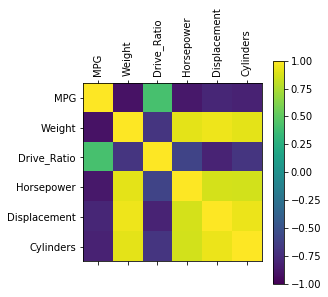

In [5]:
plt.figure()
plt.matshow(pearsonCorr)
plt.clim(-1.,1.)
plt.colorbar()
plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)

In [6]:
spearmanCorr = data.corr('spearman')
names = spearmanCorr.index.tolist()
spearmanCorr

,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
MPG,1.000000,-0.937784,0.465140,-0.886450,-0.838471,-0.828359
Weight,-0.937784,1.000000,-0.634491,0.907140,0.944804,0.896497
Drive_Ratio,0.465140,-0.634491,1.000000,-0.602754,-0.797872,-0.646733
Horsepower,-0.886450,0.907140,-0.602754,1.000000,0.895518,0.847644
Displacement,-0.838471,0.944804,-0.797872,0.895518,1.000000,0.904697
Cylinders,-0.828359,0.896497,-0.646733,0.847644,0.904697,1.000000


([<matplotlib.axis.YTick at 0x7f035205c358>,
 <a list of 6 Text yticklabel objects>)

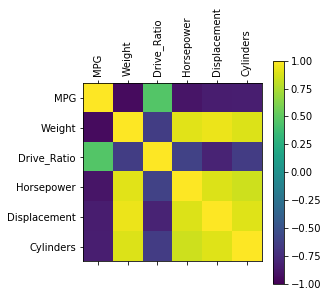

In [7]:
plt.figure()
plt.matshow(spearmanCorr)
plt.clim(-1.,1.)
plt.colorbar()
plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)

In [8]:
pearsonCorr-spearmanCorr

,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
MPG,0.000000,0.034713,-0.047915,0.015168,0.052423,0.022848
Weight,0.034713,0.000000,-0.053389,0.010081,0.005961,0.020180
Drive_Ratio,-0.047915,-0.053389,0.000000,0.013847,-0.000401,-0.045417
Horsepower,0.015168,0.010081,0.013847,0.000000,-0.023719,0.016203
Displacement,0.052423,0.005961,-0.000401,-0.023719,0.000000,0.035584
Cylinders,0.022848,0.020180,-0.045417,0.016203,0.035584,0.000000


([<matplotlib.axis.YTick at 0x7f03520c4390>,
 <a list of 6 Text yticklabel objects>)

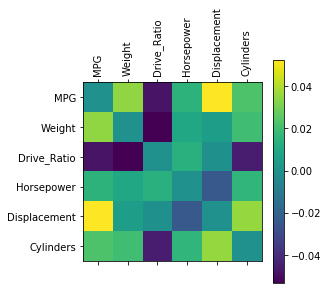

In [9]:
plt.figure()
plt.matshow(pearsonCorr-spearmanCorr)
plt.colorbar()
plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)

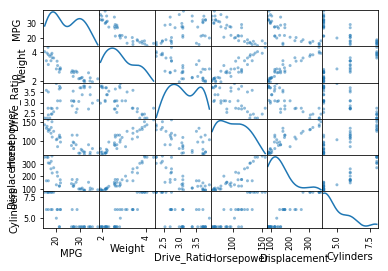

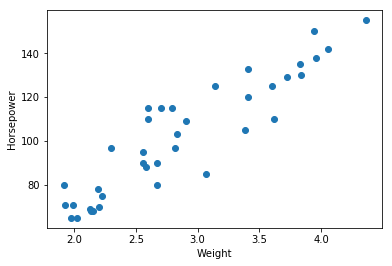

In [10]:
plt.figure()
scatter_matrix(data[names], diagonal='kde')
plt.figure()
plt.scatter(data.Weight, data.Horsepower)
plt.xlabel('Weight')
plt.ylabel('Horsepower')

# Régression linéaire

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           1.12e-12
Time:                        00:57:33   Log-Likelihood:                -97.770
No. Observations:                  38   AIC:                             199.5
Df Residuals:                      36   BIC:                             202.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.7066      2.127     21.959      0.0

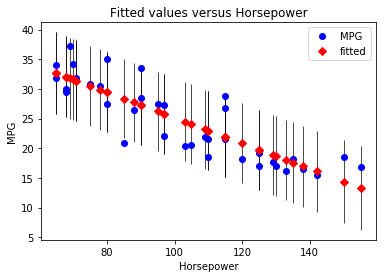

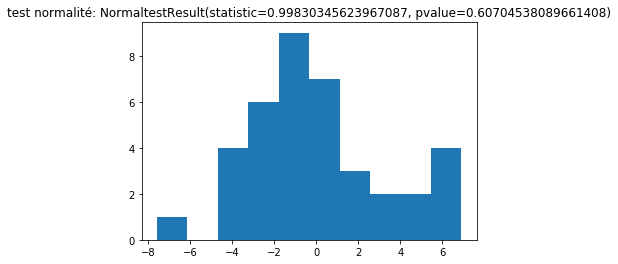

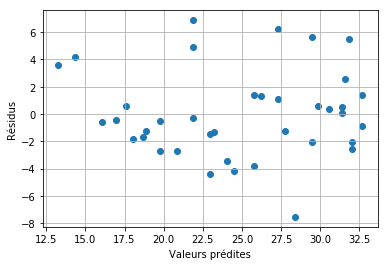

In [11]:
model = smf.ols('MPG ~ Horsepower', data = data)
results = model.fit()
print(results.summary())
plt.figure()
smg.regressionplots.plot_fit(results,1)
plt.figure()
#smg.regressionplots.plot_regress_exog(results, 'Horsepower')
plt.figure()
plt.hist(results.resid)
plt.title('test normalité: {}'.format(stats.normaltest(results.resid)))#, stats.jarque_bera(results.resid)
plt.figure()
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.grid()

In [12]:
model = smf.ols('MPG ~ Country', data = data)
results = model.fit()
print(results.summary())

dataByCountry = []
for name, grouped in data.groupby(['Country']):
    dataByCountry.append(grouped['MPG'].tolist())
F, p = stats.f_oneway(*dataByCountry)
print(data[['Country','MPG']].groupby(['Country']).describe())
print('Résultats de l\'ANOVA',F, p)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     3.406
Date:                Tue, 07 Nov 2017   Prob (F-statistic):             0.0140
Time:                        00:57:33   Log-Likelihood:                -116.71
No. Observations:                  38   AIC:                             245.4
Df Residuals:                      32   BIC:                             255.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             16.2000      5

In [13]:
# exemple de création des variables binaires correspondantes
for c in data.Country.unique():
    data[c] = (data['Country'] == c)
data['US']=data['U.S.']

model = smf.ols('MPG ~ Germany + Italy + Japan + Sweden + US', data = data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     3.406
Date:                Tue, 07 Nov 2017   Prob (F-statistic):             0.0140
Time:                        00:57:33   Log-Likelihood:                -116.71
No. Observations:                  38   AIC:                             245.4
Df Residuals:                      32   BIC:                             255.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.2000      5.688     

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     62.48
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           1.45e-15
Time:                        00:57:33   Log-Likelihood:                -79.673
No. Observations:                  38   AIC:                             171.3
Df Residuals:                      32   BIC:                             181.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       69.2205      4.626     14.963   

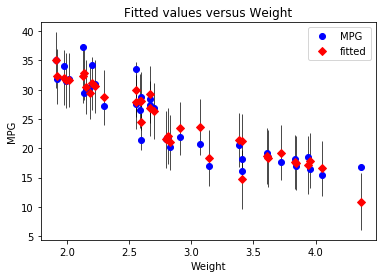

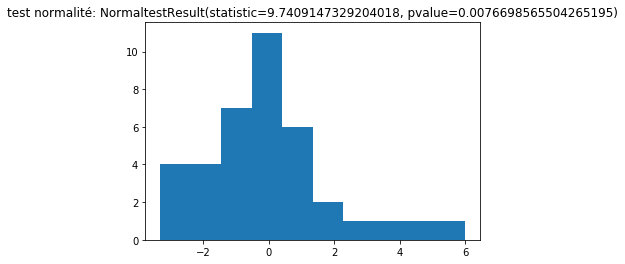

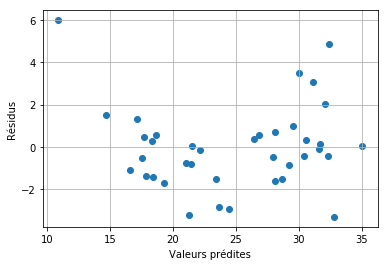

In [14]:
model = smf.ols('MPG ~ Weight + Drive_Ratio + Horsepower + Displacement + Cylinders', data = data) # data = data[1:]
#C(Cylinders)
results = model.fit()
print(results.summary())
plt.figure()
smg.regressionplots.plot_fit(results,1)
plt.figure()
#smg.regressionplots.plot_regress_exog(results, 'Horsepower')
plt.figure()
plt.hist(results.resid)
plt.title('test normalité: {}'.format(stats.normaltest(results.resid)))#, stats.jarque_bera(results.resid)
plt.figure()
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.grid()

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     148.4
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           8.05e-18
Time:                        00:57:34   Log-Likelihood:                -82.082
No. Observations:                  38   AIC:                             170.2
Df Residuals:                      35   BIC:                             175.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      70.9191      4.590     15.450      

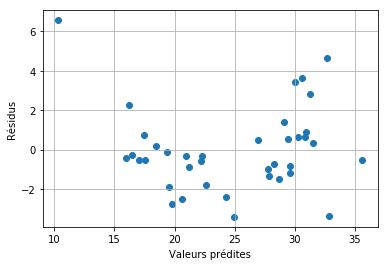

In [15]:
model = smf.ols('MPG ~ Weight + Drive_Ratio', data = data)
#C(Cylinders)
results = model.fit()
print(results.summary())
plt.figure()
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.grid()

# Modèles de choix discret

In [24]:
# jeux de donnees cars
data['MPG0'] = data['MPG']>data['MPG'].median()
#data.describe()
data[['Country','Car','MPG0']].describe()

['MPG', 'Weight', 'Drive_Ratio', 'Horsepower', 'Displacement', 'Cylinders']

In [27]:
model = sm.Logit(data['MPG0'], data[['Weight', 'Drive_Ratio', 'Horsepower', 'Displacement', 'Cylinders']])
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.396328
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   MPG0   No. Observations:                   38
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            4
Date:                Tue, 07 Nov 2017   Pseudo R-squ.:                  0.4282
Time:                        09:55:15   Log-Likelihood:                -15.060
converged:                       True   LL-Null:                       -26.340
                                        LLR p-value:                 0.0001551
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Weight          -3.7841      2.946     -1.284      0.199      -9.559       1.990
Drive_Ratio      2.9777

In [30]:
model = sm.MNLogit(data['Country'], data[['Weight', 'Horsepower', 'Displacement', 'Cylinders']])
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.546565
         Iterations 13
                          MNLogit Regression Results                          
Dep. Variable:                Country   No. Observations:                   38
Model:                        MNLogit   Df Residuals:                       18
Method:                           MLE   Df Model:                           15
Date:                Tue, 07 Nov 2017   Pseudo R-squ.:                  0.5597
Time:                        10:00:30   Log-Likelihood:                -20.769
converged:                       True   LL-Null:                       -47.170
                                        LLR p-value:                 4.159e-06
Country=Germany       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Weight              2.1390      8.854      0.242      0.809     -15.215      19.493
Horsepower   

In [41]:
# jeu de donnees autos
autos = pd.read_csv('autos.txt', delimiter='\t')
autos.describe()
autos.info()
autos.symboling.unique()
#autos['fuel-type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null float64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-null float64
peak-rpm             20

array(['_3', '_1', '_2', '_0', '_-1', '_-2'], dtype=object)

In [40]:
model = sm.MNLogit(autos['symboling'], autos[['price', 'length', 'width', 'height', 'engine-size']])
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 1.267403
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:              symboling   No. Observations:                  205
Model:                        MNLogit   Df Residuals:                      180
Method:                           MLE   Df Model:                           20
Date:                Tue, 07 Nov 2017   Pseudo R-squ.:                  0.1954
Time:                        10:04:49   Log-Likelihood:                -259.82
converged:                       True   LL-Null:                       -322.91
                                        LLR p-value:                 2.022e-17
symboling=_-2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
price         -5.754e-05      0.000     -0.331      0.741      -0.000       0.000
length            0.

In [16]:
# Travel Mode Choice http://www.statsmodels.org/stable/datasets/generated/modechoice.html
# mode =
#        1 - air
#        2 - train
#        3 - bus
#        4 - car
modechoices = sm.datasets.modechoice.load_pandas()
#print(modechoices.data.info())
#modechoices.data.describe()
data = modechoices.data[modechoices.data['choice'] == 1.].copy()
#print(data.info(), data['mode'])
#parallel_coordinates(data, 'mode')
#res=scatter_matrix(data[['mode', 'ttme', 'invc', 'invt', 'gc', 'hinc', 'psize']], diagonal='kde')

In [17]:
print(data.corr())
data['car'] = (data['mode'] == 4)
model = sm.Logit(data['car'], data[['invc', 'hinc', 'psize']])
results = model.fit()
print(results.summary())

            individual      mode  choice      ttme      invc      invt  \
individual    1.000000  0.104975     NaN -0.095073 -0.010584  0.005586   
mode          0.104975  1.000000     NaN -0.693467 -0.751150  0.470729   
choice             NaN       NaN     NaN       NaN       NaN       NaN   
ttme         -0.095073 -0.693467     NaN  1.000000  0.630972 -0.224208   
invc         -0.010584 -0.751150     NaN  0.630972  1.000000 -0.378400   
invt          0.005586  0.470729     NaN -0.224208 -0.378400  1.000000   
gc           -0.005248 -0.195573     NaN  0.318304  0.502565  0.576185   
hinc          0.051693  0.071394     NaN -0.061134  0.114834 -0.125492   
psize         0.046910  0.210923     NaN -0.142706 -0.210883  0.146518   

                  gc      hinc     psize  
individual -0.005248  0.051693  0.046910  
mode       -0.195573  0.071394  0.210923  
choice           NaN       NaN       NaN  
ttme        0.318304 -0.061134 -0.142706  
invc        0.502565  0.114834 -0.210883  
i

In [18]:
model = sm.MNLogit(modechoices.endog, modechoices.exog)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.499751
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                 choice   No. Observations:                  840
Model:                        MNLogit   Df Residuals:                      834
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Nov 2017   Pseudo R-squ.:                  0.1113
Time:                        00:57:34   Log-Likelihood:                -419.79
converged:                       True   LL-Null:                       -472.36
                                        LLR p-value:                 4.350e-21
  choice=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ttme          -0.0434      0.005     -8.972      0.000      -0.053      -0.034
invc           0.0028      0.

In [19]:
# autres? modele logit binaire (probabilite de marcher) et multinomial (choix de mode / gravite des accidents)